# Safe Air 12kV CV - C1 of Show room

## 01_Initialization

In [1]:
import os
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from safedigital.gas_pressure import GasPresExperiment_CN as gp
import seaborn as sns
sns.set(color_codes=True)
cur_dir = r'C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20230211_GP_SA12kV_CV_C1_Humidity_Variation_Test\0_Data original'
wash_dir = r'C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics\20230211_GP_SA12kV_CV_C1_Humidity_Variation_Test\1_Data formatted'


## 02_Data washing and plotting

No handles with labels found to put in legend.


2023-02-10 10:38:00    3942.666667
2023-02-10 10:39:00    3887.000000
2023-02-10 10:40:00            NaN
2023-02-10 10:41:00    3450.500000
2023-02-10 10:42:00    3270.500000
                          ...     
2023-02-17 16:37:00     141.666667
2023-02-17 16:38:00     141.333333
2023-02-17 16:39:00     141.333333
2023-02-17 16:40:00     141.166667
2023-02-17 16:41:00     141.000000
Freq: T, Name: Unit1_Mano_ppmv, Length: 10444, dtype: float64
['02-10 10:38', '22:38', '02-11 10:38', '22:38', '02-12 10:38', '22:38', '02-13 10:38', '22:38', '02-14 10:38', '22:38', '02-15 10:38', '22:38', '02-16 10:38', '22:38', '02-17 10:38']


Text(0.5, 1.0, 'Manometer Pressure Reading')

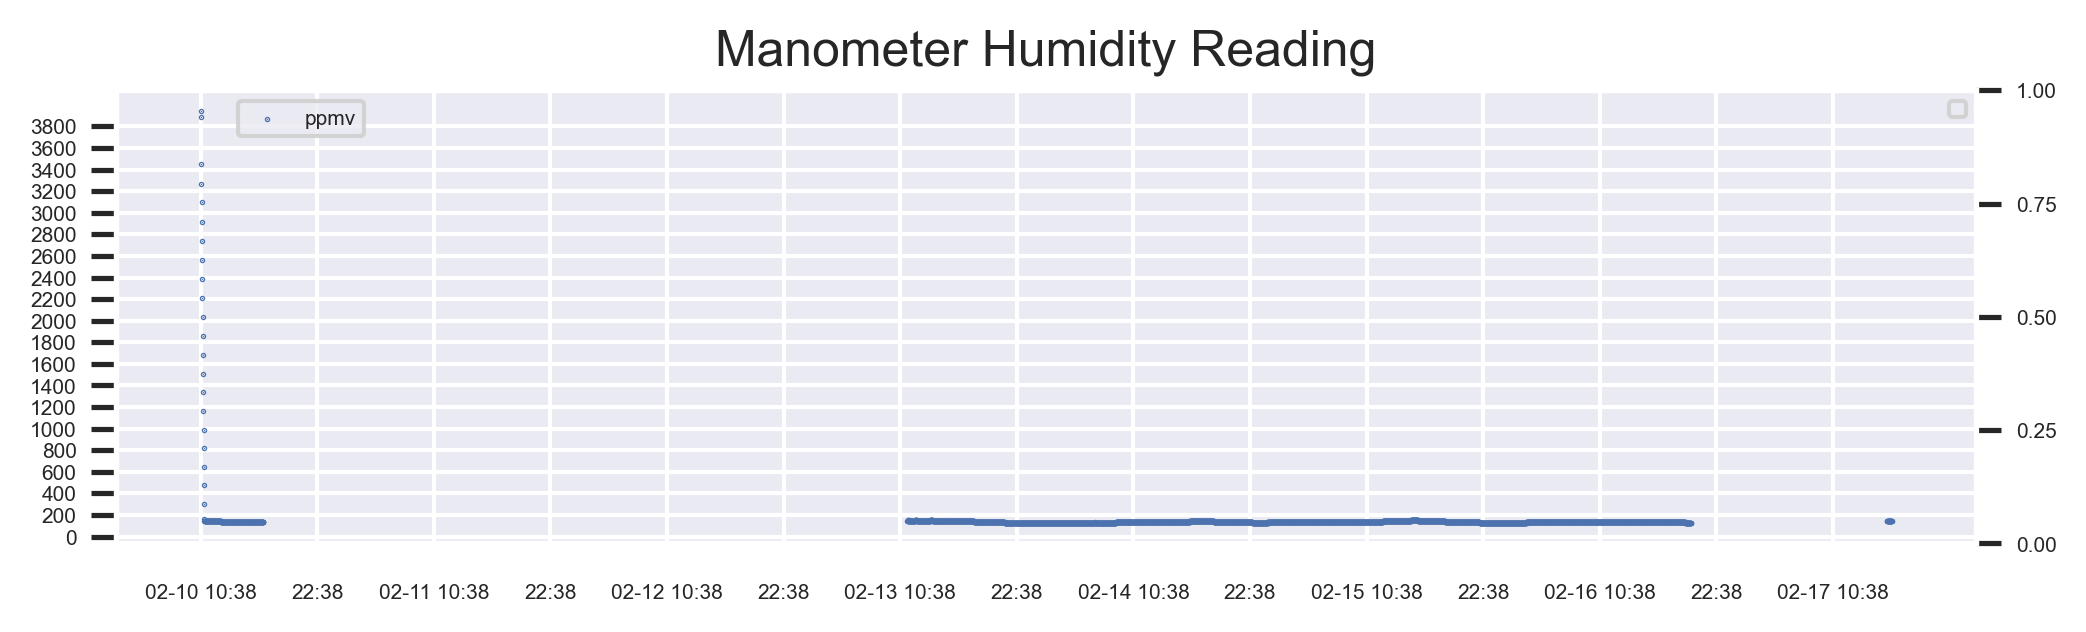

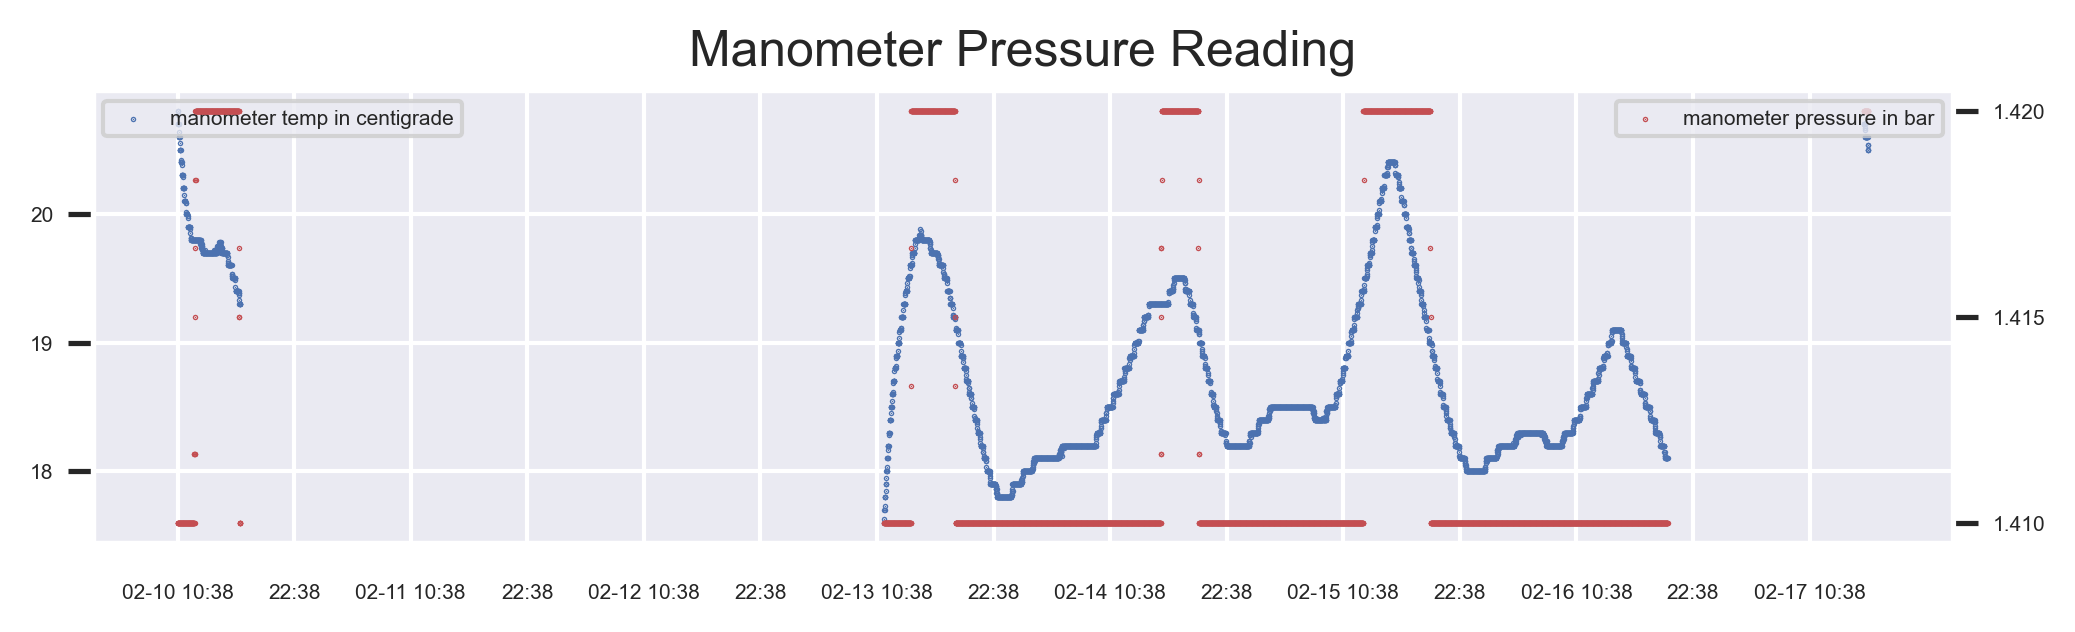

In [2]:
for cur_dir, dirs, files in os.walk(cur_dir):
	for num, file in enumerate(files):
		path = os.path.join(cur_dir, file)
		if num == 0:
			raw_data_df = gp.read_logger_data(path)
		else:
			raw_data_df = raw_data_df.append(gp.read_logger_data(path))
# print(raw_data_df)
raw_data_df = raw_data_df.resample('1min').mean()
raw_data_df.to_csv(wash_dir + '\\' + 'data_1min.csv')
# raw_data_df = raw_data_df.fillna(0)
print(raw_data_df['Unit1_Mano_ppmv'])

# create xtick list
label_list = []
for num, idx_dt in enumerate(raw_data_df.index[::720]):
	if num % 2 == 0 :
		label_list.append(datetime.strftime(idx_dt, '%m-%d %H:%M'))
	elif num % 2 == 1:
		label_list.append(datetime.strftime(idx_dt, '%H:%M'))
print(label_list)

# plot ppmv
fig1, ax1 = plt.subplots(figsize=(8,2), dpi=300)
plt.scatter(raw_data_df.index, 
			raw_data_df['Unit1_Mano_ppmv'],
			s=0.1,
			label='ppmv')
plt.xticks(raw_data_df.index[::720],label_list, fontsize=5)
plt.yticks(range(0,4000,200),fontsize=5)
# plt.grid(None)
plt.legend(loc='best',
		   fontsize='5',
		   bbox_to_anchor=(0.06, 1))

# plot dew point Td0 Td
ax2 = plt.twinx(ax1)
# ax2.scatter(raw_data_df.index, 
# 			raw_data_df['Unit1_Mano_Td'],
# 			s=0.1,
# 			c='r',
# 			label='Dew point Td in centigrade')
# ax2.scatter(raw_data_df.index, 
# 			raw_data_df['Unit1_Mano_Td0'],
# 			s=0.1,
# 			c='pink',
# 			label='Dew point Td0 in centigrade')
# ax2.scatter(raw_data_df.index, 
# 			raw_data_df['Unit1_Mano_T'],
# 			s=0.1,
# 			c='orange',
# 			label='Manometer Temp in centigrade')
ax2.set_xticklabels(label_list, fontsize=5)
plt.xticks(raw_data_df.index[::720],label_list, fontsize=5)
plt.yticks(fontsize=5)
plt.grid(None)
plt.legend(loc='upper right',
		   fontsize='5')
plt.title('Manometer Humidity Reading')

# plot gas pressure related 
fig3, ax3 = plt.subplots(figsize=(8,2), dpi=300)
ax3.scatter(raw_data_df.index, 
			raw_data_df['Unit1_Mano_T'],
			s=0.1,
			c='b',
			label='manometer temp in centigrade')
plt.xticks(raw_data_df.index[::720],label_list, fontsize=5)
plt.yticks(fontsize=5)
plt.legend(loc='upper left',
		   fontsize='5')
ax4 = plt.twinx(ax3)
ax4.scatter(raw_data_df.index, 
			raw_data_df['Unit1_Mano_P'],
			s=0.1,
			c='r',
			label='manometer pressure in bar')
plt.xticks(raw_data_df.index[::720],label_list, fontsize=5)
plt.yticks(fontsize=5)
plt.grid(None)
plt.legend(loc='upper right',
		   fontsize='5')
plt.title('Manometer Pressure Reading')